# Preços de Combustíveis
por:Josias Virgolino C. Carneiro

#### motivação e objetivos
    A motivação para esta análise foi a curiosidade sobre o preço
    do gás de cozinha e combustível e o quanto estão subindo 

### Dados usados

    a ANP acompanha os preços praticados por revendedores de combustíveis automotivos e de gás liquefeito de 
    petróleo envasilhado em botijões de 13 quilos (GLP P13), por meio de uma pesquisa semanal de preços realizada
    por empresa contratada.
    
    Na exploração inicial dos dados foi-se percebido que os dados dos datasets de forma individual tem muitas
    informações sobre empresa (local ) com a informação que nos é relevante sendo o valor de venda.


### Pré-processamento

    O Pré-processamento dos datasets começa com a leitura e transformação dos dados dos com ler o csv com ”;” em vez “,”
    e a substituição “,” por “.” na coluna  valor de venda. depois foi se escolhido a variável de localização adequadas 
    a “curiosidade” e objetivo desta análise e adequamos o valor de vendas a ela.e juntamos e organizamos ao longo do tempo

##### processo pode ser visto no arquivo "progeto_part_final.ipynb" do repositorio.

### Perguntas:

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import linregress
import matplotlib.pyplot as plt

pd.options.display.max_rows = 300000

In [57]:
Gas_file = pd.read_csv("df-glp-mean.csv")
Combutivel_file = pd.read_csv("df-ca-mean.csv")
Gas_file.set_index('Estado - Sigla',inplace=True)
Combutivel_file.set_index('Estado - Sigla',inplace=True)
Combutivel_file

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Estado - Sigla,,,,,,,,,,,,,,,,,
AC,2.030019,2.292134,2.565687,2.543324,2.594384,2.599823,2.680499,2.773884,2.816744,2.950247,3.180681,3.541670,3.778640,4.007339,4.465272,4.532287,4.475668
AL,1.662324,1.981951,2.204728,2.177856,2.183691,2.162997,2.220681,2.356619,2.355406,2.511530,2.646159,2.937623,3.330082,3.392276,3.854059,3.967808,3.878796
AM,1.812878,2.160340,2.264545,2.192882,2.218726,2.289216,2.348888,2.484564,2.541983,2.682979,2.854230,3.236998,3.564050,3.579262,3.999517,3.957297,3.896916
AP,1.921568,2.136212,2.317365,2.279376,2.386379,2.417918,2.481286,2.505762,2.498804,2.649220,2.872266,3.238681,3.694452,3.731207,4.085020,4.164993,3.647217
BA,1.710825,1.965389,2.154113,2.092595,2.122545,2.138477,2.182655,2.276800,2.288365,2.484808,2.616247,2.959885,3.250075,3.292220,3.783777,3.857249,3.720630
CE,1.748522,1.970985,2.189105,2.143367,2.192550,2.186818,2.210840,2.313760,2.325806,2.542682,2.697856,3.062225,3.447023,3.471882,3.907002,4.019229,3.891195
DF,1.710595,1.934475,2.142739,2.068538,2.136894,2.178352,2.247938,2.369812,2.399616,2.558136,2.722797,3.066765,3.361625,3.481043,3.874845,3.782521,3.749991
ES,1.610335,1.899299,2.169561,2.126451,2.150239,2.182212,2.250343,2.438121,2.478350,2.578162,2.703486,3.005932,3.285953,3.406373,3.795094,3.894106,3.738419
GO,1.624860,1.880037,2.066424,1.977197,2.042661,2.063777,2.076292,2.288830,2.289193,2.421722,2.621289,2.900289,3.202795,3.298322,3.728631,3.724976,3.622168


##### 1- quando o gás começou a aumentar
    R: O aumento começou em 2013,  entre 2018 a 2020 houve uma certa
    manutenção dos preços,e logo após houve um grande aumento.

<AxesSubplot:>

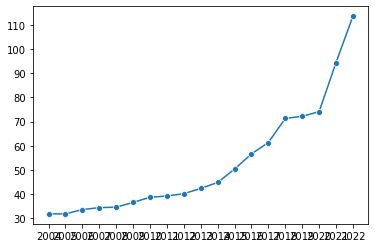

In [35]:
js= Gas_file.mean(axis=0)
js
sns.lineplot(data=js,marker="o")

##### 2- este mesmo aumento é visto na paraíba?
    R: Sim

<AxesSubplot:ylabel='PB'>

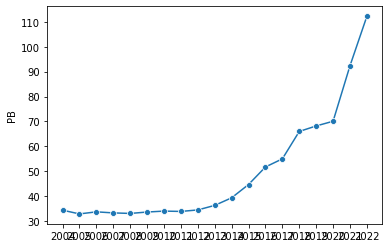

In [42]:
jr = Gas_file.transpose()
sns.lineplot(data=jr["PB"],marker="o")

##### 3- foi possivel usar regressão linear para estimar o preço?

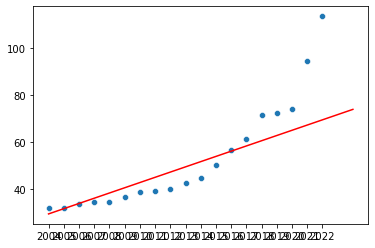

1.3854821104803268

In [56]:
result = linregress(Gas_file.mean(),range(4,23))
def f(x):
    return x*result.slope + result.intercept +28

sns.scatterplot(data=Gas_file.mean())
plt.plot((0,20), (f(0), f(202.3)), c='red')
plt.show()
result.intercept

##### 4- quais descobertas foram feitas ao separar em grupos com kmeans?
    R: A maior parte dos estados dos estados pertencentes ao grupo 1 são da região norte. Maranhão(MA) e Amazonas (AM) por mais que estejam rodeados do grupo 1 são do grupo 0. tocantins e piauí tem o preço médio de combustível do grupo 0 mas estão no grupo 1

C:\Users\josia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\josia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='2020_ca', ylabel='2020_glp'>

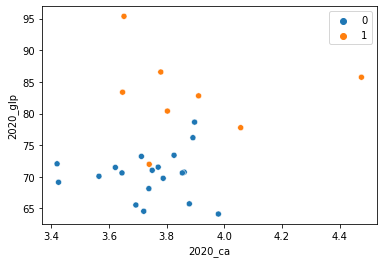

In [61]:
df_file = pd.merge(Combutivel_file, Gas_file[:2020], on="Estado - Sigla", suffixes=('_ca', '_glp'))
def Normal (file):
    return (file - file.mean())/file.std()
normalized_df = Normal(df_file)
kmeans = KMeans(n_clusters=2)
kmeans.fit(normalized_df)
sns.scatterplot(data=df_file, x="2020_ca", y="2020_glp", hue=kmeans.labels_)

### Conclusão

    o objetivo inicial do projeto foi alcançado, os preços estavam subindo exponencialmente. e outras curiosidades foram descobertas e saciadas durante o projeto.
